# Project: Fit Additive models to the Cherry Blossoms Peak Bloom Day Data

# 1. Introduction
## 1.1. Background
In Japan, one big cultural event is viewing cherry blossoms. Every year, experts in Japan try to predict when the peak bloom (75% of all trees in bloom) at different cities will occur.

## 1.2. Objectives
Predict the peak bloom day of the year (DOY) with varying years and location/latitudes in Japan.

# 2. Methods
+ Exploratory Data Analysis (EDA)
+ Data Wrangling
+ Data Visualization 
+ Additive Model Building
+ Summary

# 3. EDA

In [2]:
library(tidyverse) 
library(readxl)

### Import Data

data: Full-flowering days in different cities in Japan in varying years.
* lat: latitude<br> 
* long: longitude<br>
* alt: altitude<br>
* Fbloom_date: Full-flowering date<br>
* Fbloom_doy/DOY: day of the year, for cherry blossom full-flowering, e.g., 150: 150th day

In [3]:
data <- read_excel("/content/FullFlower.xls", sheet = 2, col_names = TRUE, na = c("","NA"))
print(data, n = 5)

# A tibble: 6,573 × 7
  Location         lat  long   alt  year Fbloom_date         Fbloom_doy
  <chr>          <dbl> <dbl> <dbl> <dbl> <dttm>                   <dbl>
1 Japan/Wakkanai  45.4  142.  2.85  1953 1953-05-30 00:00:00        150
2 Japan/Wakkanai  45.4  142.  2.85  1954 1954-05-27 00:00:00        147
3 Japan/Wakkanai  45.4  142.  2.85  1955 1955-05-23 00:00:00        143
4 Japan/Wakkanai  45.4  142.  2.85  1956 1956-05-14 00:00:00        135
5 Japan/Wakkanai  45.4  142.  2.85  1957 1957-05-22 00:00:00        142
# ℹ 6,568 more rows


### Subset Data

In [4]:
# Rename for better reference
names(data)[c(5,7)] <- c("Year", "DOY") 

# Data subset - remove Fbloom_date
df <- data[,-6]
head(df, n = 3)
tail(df, n = 3)

print("Data Dimension:")
dim(df)

Location,lat,long,alt,Year,DOY
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Japan/Wakkanai,45.415,141.6789,2.85,1953,150
Japan/Wakkanai,45.415,141.6789,2.85,1954,147
Japan/Wakkanai,45.415,141.6789,2.85,1955,143


Location,lat,long,alt,Year,DOY
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Japan/Ishigakijima,24.33667,124.1644,5.7,2018,38
Japan/Ishigakijima,24.33667,124.1644,5.7,2019,39
Japan/Ishigakijima,24.33667,124.1644,5.7,2021,39


[1] "Data Dimension:"


[1] 6573    6

### Data Summary

As shown in the data summary below, the year ranges from 1953 to 2021, while the DOY ranges from 8 to 160 meaning the cherry blossom peak day occured between the 8th and the 160th day of the years at 103 different cities in Japan associated with varying latitude, longitude, and altitude. And the mean and S.D. of DOY are 101.1 and 22.4, respectively. 

In [5]:
paste("Data Summary:")
summary(df)
paste("S.D. of DOY = ", round(sd(df$DOY, na.rm = T),1))

[1] "Data Summary:"

   Location              lat             long            alt        
 Length:6573        Min.   :24.34   Min.   :123.0   Min.   :  0.50  
 Class :character   1st Qu.:34.15   1st Qu.:133.5   1st Qu.:  5.32  
 Mode  :character   Median :35.52   Median :137.0   Median : 19.20  
                    Mean   :36.22   Mean   :136.7   Mean   : 55.89  
                    3rd Qu.:38.26   3rd Qu.:140.5   3rd Qu.: 42.30  
                    Max.   :45.41   Max.   :145.6   Max.   :610.00  
      Year           DOY       
 Min.   :1953   Min.   :  8.0  
 1st Qu.:1970   1st Qu.: 93.0  
 Median :1986   Median : 99.0  
 Mean   :1986   Mean   :101.1  
 3rd Qu.:2001   3rd Qu.:111.0  
 Max.   :2021   Max.   :160.0  

[1] "S.D. of DOY =  22.4"

In [6]:
paste("Some cities in Japan included:")
print(unique(df$Location)[1:20])
paste("Number of Cities:")
length(unique(df$Location))

[1] "Some cities in Japan included:"

 [1] "Japan/Wakkanai"  "Japan/Mombetsu"  "Japan/Abashiri"  "Japan/Rumoi"    
 [5] "Japan/Asahikawa" "Japan/Nemuro"    "Japan/Iwamizawa" "Japan/Sapporo"  
 [9] "Japan/Kushiro"   "Japan/Obihiro"   "Japan/Kutchan"   "Japan/Muroran"  
[13] "Japan/Hiroo"     "Japan/Urakawa"   "Japan/Esashi"    "Japan/Hakodate" 
[17] "Japan/Aomori"    "Japan/Hachinohe" "Japan/Akita"     "Japan/Morioka"  


[1] "Number of Cities:"

[1] 103

### Data Exploration

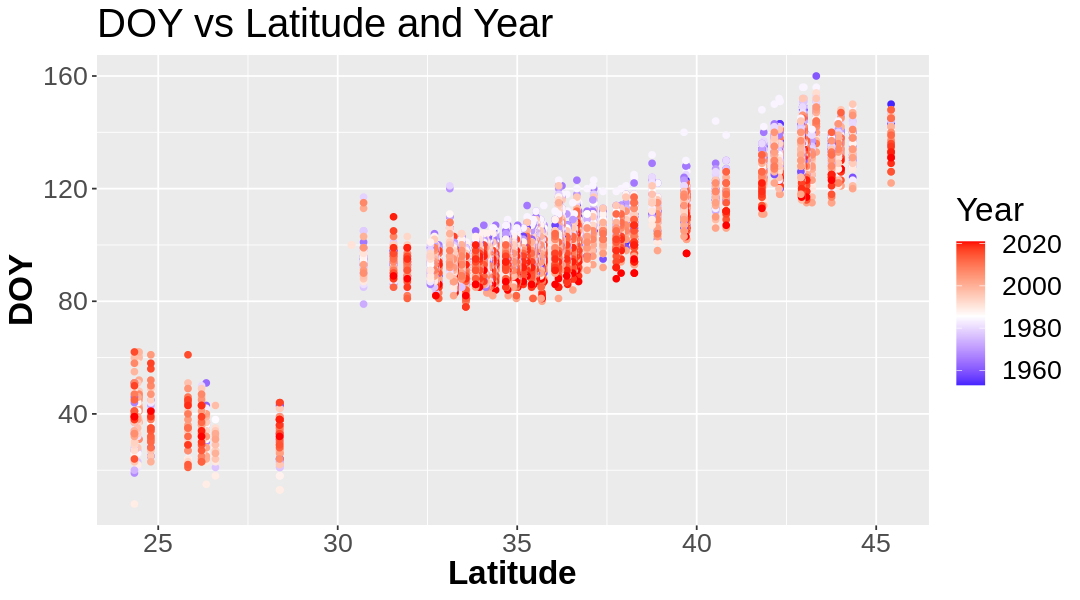

In [7]:
mid <- mean(as.numeric(df$Year))
options(repr.plot.width = 9, repr.plot.height = 5)
ggplot(data = df) + geom_point(mapping = aes(x = lat,y = DOY,
color = as.numeric(Year)))+
xlab("Latitude") + ylab("DOY")+
ggtitle ("DOY vs Latitude and Year")+
labs(colour = "Year")+
scale_color_gradient2(low = "blue", midpoint = mid, mid = "white",
high = "red", space = "Lab")+
theme (title = element_text(size = 20), 
axis.text = element_text(size = 16), 
axis.title = element_text(size = 20,face = "bold"),
legend.text = element_text(size = 16),
legend.title = element_text(size = 20))

# 4. Data Wrangling

### Remove Duplicate Rows

In [28]:
print("Duplicate rows:")
reprows <- df %>%
  dplyr::group_by(Location, lat, long, alt, Year, DOY) %>%
  dplyr::summarise(n = dplyr::n(), .groups = "drop") %>%
  dplyr::filter(n > 1L)

print (reprows)
print("Cities with repeated data:")
print(unique(reprows$Location))

[1] "Duplicate rows:"
# A tibble: 119 × 7
   Location      lat  long   alt  Year   DOY     n
   <chr>       <dbl> <dbl> <dbl> <dbl> <dbl> <int>
 1 Japan/Akita  39.7  140.   6.3  1953   119     2
 2 Japan/Akita  39.7  140.   6.3  1954   112     2
 3 Japan/Akita  39.7  140.   6.3  1955   113     2
 4 Japan/Akita  39.7  140.   6.3  1956   117     2
 5 Japan/Akita  39.7  140.   6.3  1957   119     2
 6 Japan/Akita  39.7  140.   6.3  1958   119     2
 7 Japan/Akita  39.7  140.   6.3  1959   107     2
 8 Japan/Akita  39.7  140.   6.3  1960   118     2
 9 Japan/Akita  39.7  140.   6.3  1961   113     2
10 Japan/Akita  39.7  140.   6.3  1962   114     2
# ℹ 109 more rows
[1] "Cities with repeated data:"
[1] "Japan/Akita"        "Japan/Shionomisaki"


In [29]:
df2 <- df[!duplicated(df),]
print("Data dimension of unique rows:")
dim(df2)

[1] "Data dimension of unique rows:"


[1] 6454    6

### Check Rows with the Same Predictors

In [10]:
reprows2 <- df2 %>%
  dplyr::group_by(Location, lat, long, alt, Year) %>%
  dplyr::summarise(n = dplyr::n(), .groups = "drop") %>%
  dplyr::filter(n > 1L)

print (reprows2) 
# No such rows

# A tibble: 0 × 6
# ℹ 6 variables: Location <chr>, lat <dbl>, long <dbl>, alt <dbl>, Year <dbl>,
#   n <int>


### Check Rows with the Same Location and Year

In [31]:
reprows3 <- df2 %>%
  dplyr::group_by(Location, Year) %>%
  dplyr::summarise(n = dplyr::n(), .groups = "drop") %>%
  dplyr::filter(n > 1L)

print (reprows3)
# Rows with the same location and year but different geographic coordinates

# A tibble: 466 × 3
   Location       Year     n
   <chr>         <dbl> <int>
 1 Japan/Izuhara  1953     2
 2 Japan/Izuhara  1954     2
 3 Japan/Izuhara  1955     2
 4 Japan/Izuhara  1956     2
 5 Japan/Izuhara  1957     2
 6 Japan/Izuhara  1958     2
 7 Japan/Izuhara  1959     2
 8 Japan/Izuhara  1960     2
 9 Japan/Izuhara  1961     2
10 Japan/Izuhara  1962     2
# ℹ 456 more rows


In [32]:
# Exampes
df2[df2$Location  == "Japan/Izuhara" & df2$Year < 1955, ]

Location,lat,long,alt,Year,DOY
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Japan/Izuhara,34.19778,129.2919,3.65,1953,98
Japan/Izuhara,34.19778,129.2919,3.65,1954,92
Japan/Izuhara,34.15333,129.2228,130.00,1953,98
Japan/Izuhara,34.15333,129.2228,130.00,1954,92


In [37]:
# Get geographic coordinate means
df3 <- df2 %>% group_by(Location, Year, DOY) %>% 
  summarise(lat = mean(lat), long = mean(long), alt = mean(alt), .groups = 'drop')
print(df3)

# A tibble: 5,988 × 6
   Location        Year   DOY   lat  long   alt
   <chr>          <dbl> <dbl> <dbl> <dbl> <dbl>
 1 Japan/Abashiri  1953   146  44.0  144.  37.6
 2 Japan/Abashiri  1954   139  44.0  144.  37.6
 3 Japan/Abashiri  1955   140  44.0  144.  37.6
 4 Japan/Abashiri  1956   134  44.0  144.  37.6
 5 Japan/Abashiri  1959   127  44.0  144.  37.6
 6 Japan/Abashiri  1966   141  44.0  144.  37.6
 7 Japan/Abashiri  1968   131  44.0  144.  37.6
 8 Japan/Abashiri  1969   133  44.0  144.  37.6
 9 Japan/Abashiri  1970   130  44.0  144.  37.6
10 Japan/Abashiri  1971   140  44.0  144.  37.6
# ℹ 5,978 more rows


### Wider Data Structure

In [38]:
df4 <- df3 %>%
  pivot_wider(names_from = Year, values_from = DOY)
print(df4)

# A tibble: 103 × 73
   Location    lat  long    alt `1953` `1954` `1955` `1956` `1959` `1966` `1968`
   <chr>     <dbl> <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>
 1 Japan/Ab…  44.0  144.  37.6     146    139    140    134    127    141    131
 2 Japan/Ai…  38.0  138.   5.5     110    101    102    108     99    111    108
 3 Japan/Ak…  39.7  140.   6.3     119    112    113    117    107    115    115
 4 Japan/Ao…  40.8  141.   2.8      NA     NA     NA    123    115    125    124
 5 Japan/As…  43.8  142. 120.      136    138    134    134    133    138    126
 6 Japan/Ch…  35.7  141.  20.1      95     95     94    102     92     95     95
 7 Japan/Es…  41.9  140.   3.72    135    128    128    130    126    129    126
 8 Japan/Fu…  32.7  129.  25.1      96     97     92     98     91     89     96
 9 Japan/Fu…  36.1  136.   8.8     102     96     99    105     94     99    102
10 Japan/Fu…  33.6  130.   2.5      95     98     95    100     91     94     94
# ℹ 93 

### Missing Data

##### Missing Counts

In [39]:
print("Missing data for location variables:")
print(colSums(is.na(df4[, 1:4])))

print("Missing data for each row:")
print (count_na <- rowSums(is.na(df4)))

[1] "Missing data for location variables:"
Location      lat     long      alt 
       0        0        0        0 
[1] "Missing data for each row:"
  [1]  9 14  0  3  0  0 15 12  0  1  0  0 13 14  0 14 17  0 28  0 15 45 14 17 12
 [26]  0  0  0  4  0  0  0 38  2 18  0  0  9  6 14  0 26  0 35 14 23  0 17  0  0
 [51]  0  0 46  0 24  1 16 16 19  0 36  0  0  0 13  8 22 14 16  1 13 12  1  0  0
 [76] 29 19 24  0 20 14  0 16 30 31  0  0  0  0 14  0 16 12  0 30 11  2  9 68  0
[101]  0 14 53


##### Missing Percentages

[1] "Missing percentages:"
  [1] 0.13 0.20 0.00 0.04 0.00 0.00 0.22 0.17 0.00 0.01 0.00 0.00 0.19 0.20 0.00
 [16] 0.20 0.25 0.00 0.41 0.00 0.22 0.65 0.20 0.25 0.17 0.00 0.00 0.00 0.06 0.00
 [31] 0.00 0.00 0.55 0.03 0.26 0.00 0.00 0.13 0.09 0.20 0.00 0.38 0.00 0.51 0.20
 [46] 0.33 0.00 0.25 0.00 0.00 0.00 0.00 0.67 0.00 0.35 0.01 0.23 0.23 0.28 0.00
 [61] 0.52 0.00 0.00 0.00 0.19 0.12 0.32 0.20 0.23 0.01 0.19 0.17 0.01 0.00 0.00
 [76] 0.42 0.28 0.35 0.00 0.29 0.20 0.00 0.23 0.43 0.45 0.00 0.00 0.00 0.00 0.20
 [91] 0.00 0.23 0.17 0.00 0.43 0.16 0.03 0.13 0.99 0.00 0.00 0.20 0.77
[1] "Number of rows with >= 60% data missing:"


[1] 4

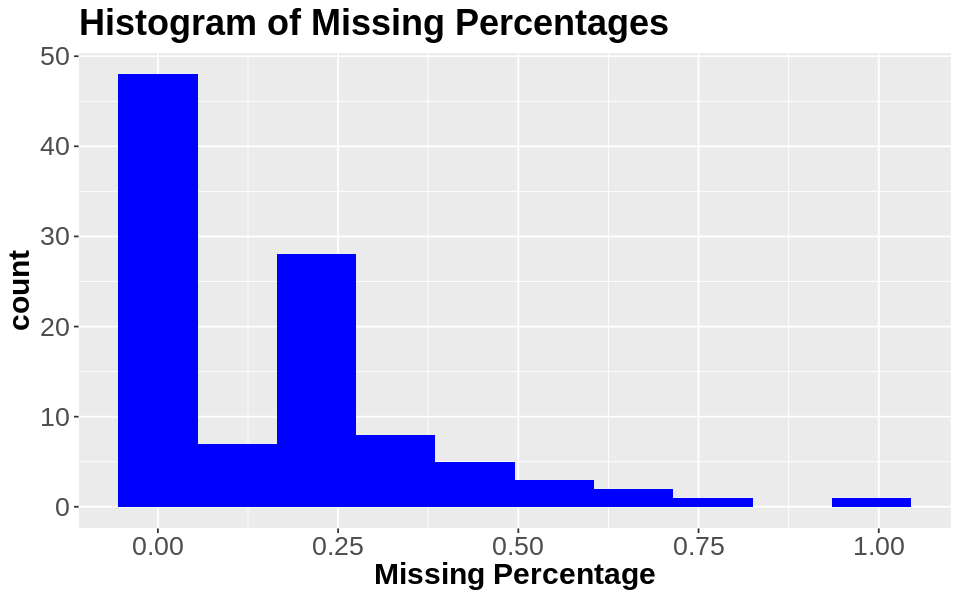

In [69]:
missperc <- round(count_na/(73-4), 2)
print("Missing percentages:")
print(missperc)

# Histogram of predictions
data.frame(miss = missperc) %>%
  ggplot(aes(x = missperc)) + 
  geom_histogram(bins = 10, fill = 'blue') +
  labs(title = 'Histogram of Missing Percentages', x = 'Missing Percentage') +
  theme( axis.text = element_text(size = 16),
         axis.title = element_text(size = 18,face = "bold"),
         title = element_text(size = 18,face = "bold")) 
         
print("Number of rows with >= 60% data missing:")
sum(missperc >= 0.6)

# Remove rows with >= 40% data missing
df5 <- df4[missperc < 0.6,] 

In [ ]:
# Location and Latitude are 1-1 corresponded
print("Number of unique location:")
length(unique(df6$lat)) # =99
print("Number of unique latitude:")
length(unique(df6$Location)) # =99

### Longer Data Structure

In [71]:
df6 <- df5 %>% pivot_longer(5:73, names_to = "Year", values_to = "DOY")  
print(df6)

# A tibble: 6,831 × 6
   Location         lat  long   alt Year    DOY
   <chr>          <dbl> <dbl> <dbl> <chr> <dbl>
 1 Japan/Abashiri  44.0  144.  37.6 1953    146
 2 Japan/Abashiri  44.0  144.  37.6 1954    139
 3 Japan/Abashiri  44.0  144.  37.6 1955    140
 4 Japan/Abashiri  44.0  144.  37.6 1956    134
 5 Japan/Abashiri  44.0  144.  37.6 1959    127
 6 Japan/Abashiri  44.0  144.  37.6 1966    141
 7 Japan/Abashiri  44.0  144.  37.6 1968    131
 8 Japan/Abashiri  44.0  144.  37.6 1969    133
 9 Japan/Abashiri  44.0  144.  37.6 1970    130
10 Japan/Abashiri  44.0  144.  37.6 1971    140
# ℹ 6,821 more rows


In [44]:
# Remove data wth missing DOY
df7 <- df6[!is.na(df6$DOY),]
print(df7)

# A tibble: 5,924 × 6
   Location         lat  long   alt Year    DOY
   <chr>          <dbl> <dbl> <dbl> <chr> <dbl>
 1 Japan/Abashiri  44.0  144.  37.6 1953    146
 2 Japan/Abashiri  44.0  144.  37.6 1954    139
 3 Japan/Abashiri  44.0  144.  37.6 1955    140
 4 Japan/Abashiri  44.0  144.  37.6 1956    134
 5 Japan/Abashiri  44.0  144.  37.6 1959    127
 6 Japan/Abashiri  44.0  144.  37.6 1966    141
 7 Japan/Abashiri  44.0  144.  37.6 1968    131
 8 Japan/Abashiri  44.0  144.  37.6 1969    133
 9 Japan/Abashiri  44.0  144.  37.6 1970    130
10 Japan/Abashiri  44.0  144.  37.6 1971    140
# ℹ 5,914 more rows


# 5. Data Visualization

### DOY vs Latitude and Year

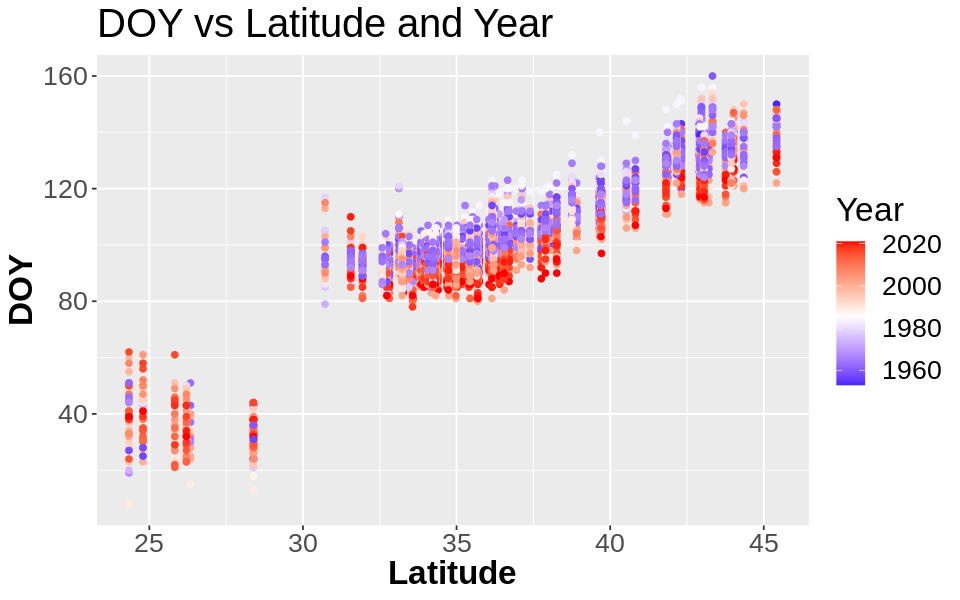

In [19]:
mid <- mean(as.numeric(df7$Year))
options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(data = df7) + geom_point(mapping = aes(x = lat,y = DOY,
color = as.numeric(Year)))+
xlab("Latitude") + ylab("DOY")+
ggtitle ("DOY vs Latitude and Year")+
labs(colour = "Year")+
scale_color_gradient2(low = "blue", midpoint = mid, mid = "white",
high = "red", space = "Lab")+
theme (title = element_text(size = 20), 
axis.text = element_text(size = 16), 
axis.title = element_text(size = 20,face = "bold"),
legend.text = element_text(size = 16),
legend.title = element_text(size = 20))

### DOY vs Year and Latitude

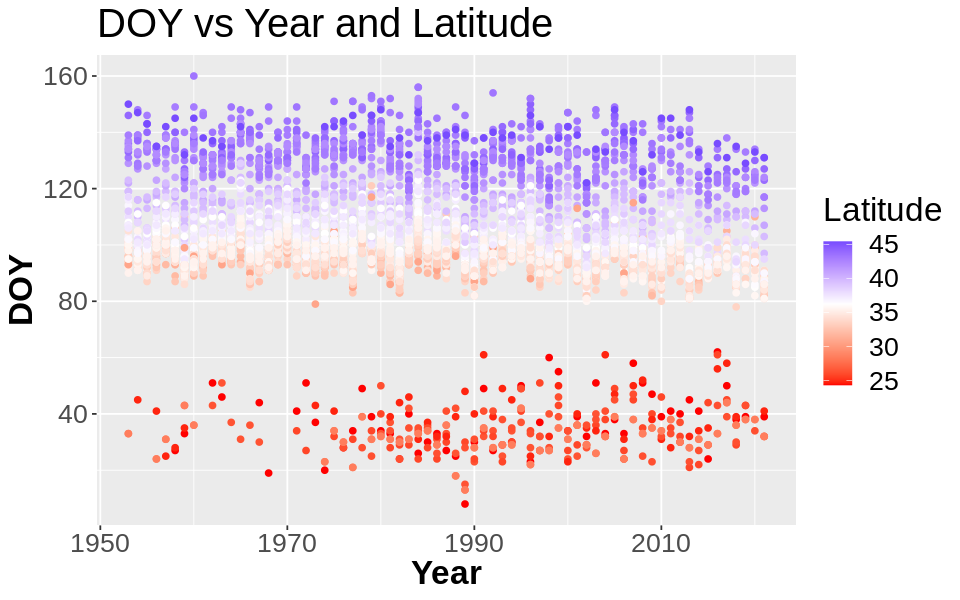

In [20]:
mid2 <- mean(df$lat)
options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(data = df7) + geom_point(mapping = aes(x = as.numeric(Year),
y = DOY, color = lat))+
xlab("Year") + ylab("DOY")+
ggtitle ("DOY vs Year and Latitude")+
labs(colour = "Latitude")+
scale_color_gradient2(low = "red", midpoint = mid2, mid = "white",
high = "blue", space = "Lab")+
theme (title = element_text(size = 20), 
axis.text = element_text(size = 16), 
axis.title = element_text(size = 20,face = "bold"),
legend.text = element_text(size = 16),
legend.title = element_text(size = 20))

# 6. Additive Model Building

### Fit Model

In [83]:
g <- lm(df7$DOY  ~ relevel(factor(df7$Location), ref = "Japan/Maebashi") +
  relevel(factor(df7$Year), ref ='1961'))
#summary(g)[1:10] # R-squared: 0.97, p-value: < 2.2e-16

### Estimated coefficients

In [73]:
print(g$coefficients[1])
# City estimates in order
coef_city <- sort(g$coefficients[2:99],decreasing = TRUE)
print("3 high coefficients (positive) for the cities:")
print(coef_city[1:3])
print("3 high coefficients (negetive) for the cities:")
print(coef_city[96:98])

(Intercept) 
   97.72942 
[1] "3 high coefficients (positive) for the cities:"
  relevel(factor(df7$Location), ref = "Japan/Maebashi")Japan/Nemuro 
                                                           46.97887 
 relevel(factor(df7$Location), ref = "Japan/Maebashi")Japan/Kushiro 
                                                           43.41429 
relevel(factor(df7$Location), ref = "Japan/Maebashi")Japan/Wakkanai 
                                                           41.24535 
[1] "3 high coefficients (negetive) for the cities:"
       relevel(factor(df7$Location), ref = "Japan/Maebashi")Japan/Kumejima 
                                                                 -64.75452 
relevel(factor(df7$Location), ref = "Japan/Maebashi")Japan/Naze/Funchatoge 
                                                                 -65.37833 
           relevel(factor(df7$Location), ref = "Japan/Maebashi")Japan/Naze 
                                                                 -65.37833

In [74]:
# Year estimates in order
coef_year <- sort(g$coefficients[100:167],decreasing = TRUE)
print("3 high coefficients (negetive) for the years:")
print(coef_year[1:3])
print("3 high coefficients (negetive) for the years:")
print(coef_year[66:68])

[1] "3 high coefficients (negetive) for the years:"
relevel(factor(df7$Year), ref = "1961")1984 
                                   9.949667 
relevel(factor(df7$Year), ref = "1961")1965 
                                   8.224149 
relevel(factor(df7$Year), ref = "1961")1970 
                                   6.286301 
[1] "3 high coefficients (negetive) for the years:"
relevel(factor(df7$Year), ref = "1961")2018 
                                  -8.240530 
relevel(factor(df7$Year), ref = "1961")2021 
                                  -9.586672 
relevel(factor(df7$Year), ref = "1961")2002 
                                 -10.254077 


### Residual Plots

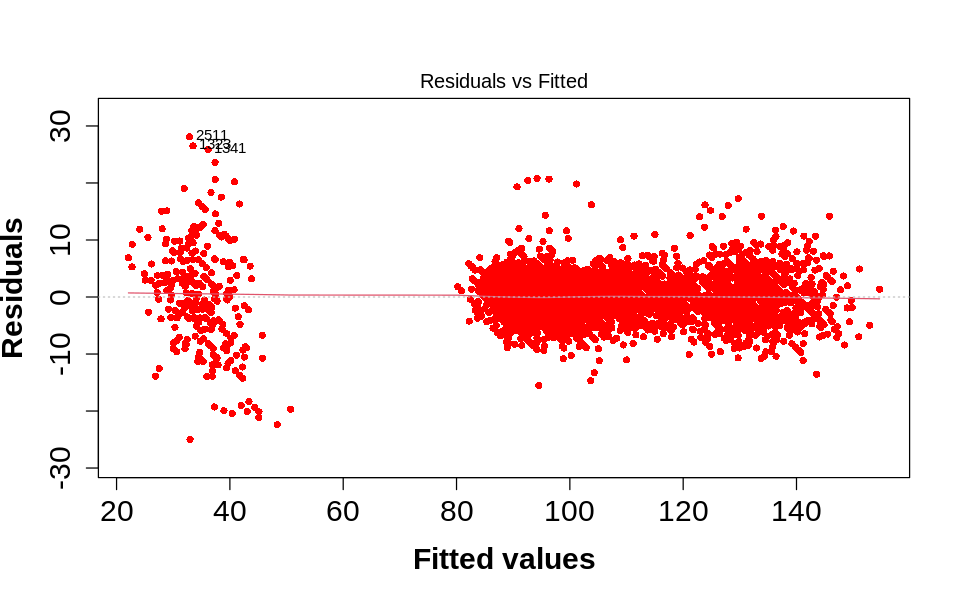

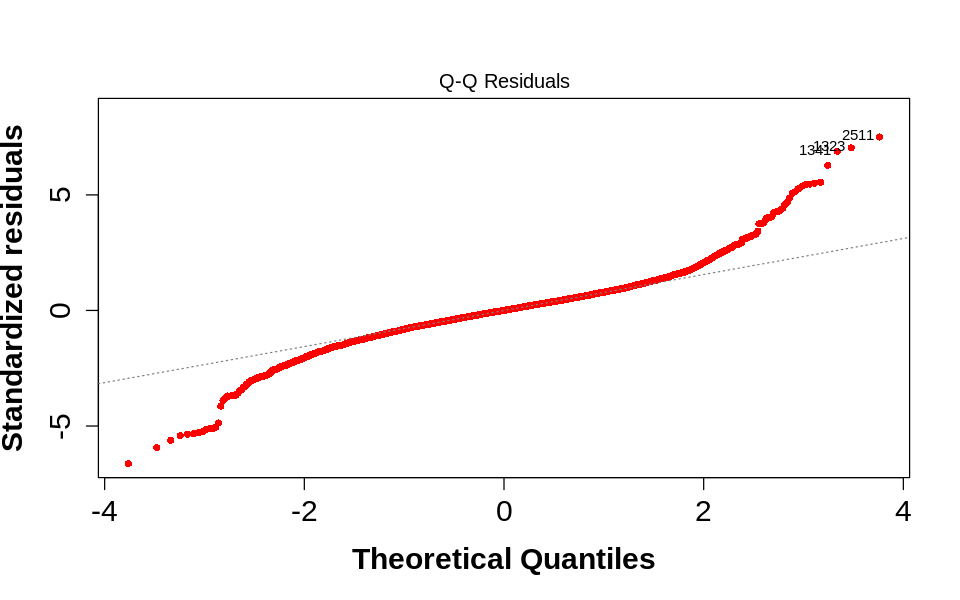

In [24]:
layout(matrix(c(1,1), 1, 2, byrow = F)) 
plot(g,1:2, col = "red", pch = 16, cex = 0.8, cex.axis = 1.5, 
cex.lab = 1.5, font.lab = 2.5)

### Prediction for Kyoto City

In [77]:
Predicted <- g$fitted.values
df8 <- cbind(df7, Predicted)
names(df8)[7] <- "Predicted"
df9 <- df8[df8$Location == "Japan/Kyoto",]
df_kyoto <- df9[order(df9$Year),]
print("Data frame for Kyoto city:")
print(tibble(df_kyoto))

[1] "Data frame for Kyoto city:"
# A tibble: 69 × 7
   Location      lat  long   alt Year    DOY Predicted
   <chr>       <dbl> <dbl> <dbl> <chr> <dbl>     <dbl>
 1 Japan/Kyoto  35.0  136.  40.8 1953    101      99.3
 2 Japan/Kyoto  35.0  136.  40.8 1954     95      95.4
 3 Japan/Kyoto  35.0  136.  40.8 1955     97      95.5
 4 Japan/Kyoto  35.0  136.  40.8 1956    101      99.0
 5 Japan/Kyoto  35.0  136.  40.8 1957    102     101. 
 6 Japan/Kyoto  35.0  136.  40.8 1958     98      97.4
 7 Japan/Kyoto  35.0  136.  40.8 1959     92      92.1
 8 Japan/Kyoto  35.0  136.  40.8 1960     96      97.6
 9 Japan/Kyoto  35.0  136.  40.8 1961     96      96.5
10 Japan/Kyoto  35.0  136.  40.8 1962     97      98.9
# ℹ 59 more rows


### Actual vs Predicted Plot

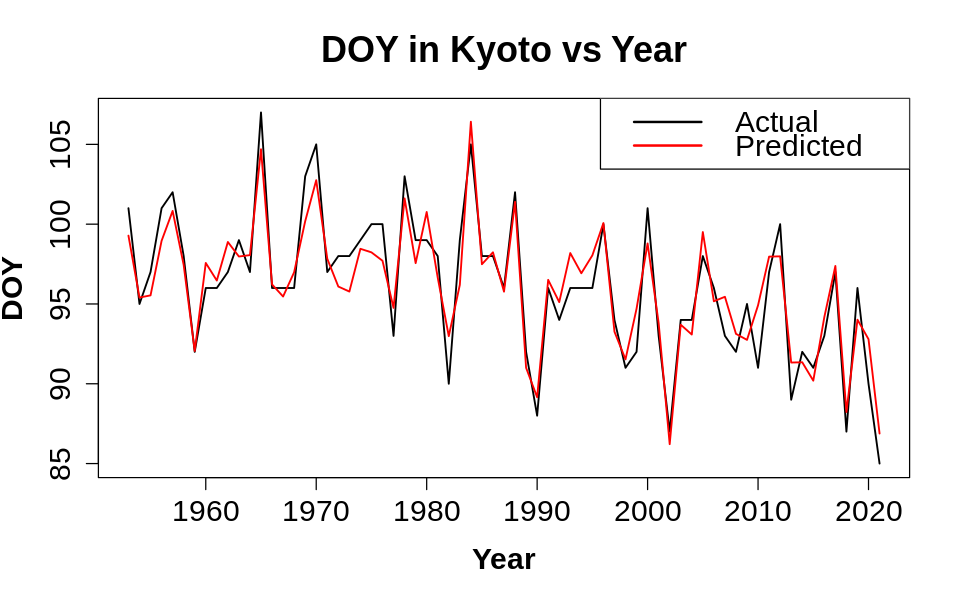

In [80]:
plot(df_kyoto$Year, df_kyoto$DOY, type = "l",col = "black", lwd = 1.5, xlab = "Year",
     ylab = "DOY", main = "DOY in Kyoto vs Year",
     cex.main = 1.8, cex.axis = 1.5, cex.lab = 1.5, font.lab = 2.5)
lines(df_kyoto$Year, df_kyoto$Predicted, col = "red", lwd = 1.5)
legend("topright",legend = c('Actual', 'Predicted'),lty = c(1.5,1.5),
cex = 1.5, col = c("black","red"),bg = "white",lwd = 2)

### Root Mean Square Error (RMSE)

In [86]:
RMSE_kyoto <- sqrt(sum((df_kyoto$Predicted - df_kyoto$DOY)^2)/69)
print("RMSE for Kyoto city: ")
round(RMSE_kyoto, 2) # = 1.61
RMSE_all <- sqrt(sum((df8$Predicted - df8$DOY)^2)/5924)
print("RMSE for all cities: ")
round(RMSE_all, 2) # = 3.77

[1] "RMSE for Kyoto city: "


[1] 1.61

[1] "RMSE for all cities: "


[1] 3.77

# 7. Summary
In this project, the data set for the cherry blossom peak bloom days (DOY) in different cities and years was analyzed using additive models. Data wrangling precedures including data cleaning and data structure manipulation were completed. Cleaned data was visualized using tidyverse ggplot package. It is noticed the DOY increases with a rising altitude which means cherry blossoms bloom later at colder areas. And the DOY tends to decrease in recent years with a fixed latitude, this indicates cherry blossoms reach to the peak bloom day earlier due to global warming. The applied additive model fits the DOY data well with location and year predictors. The model $R^2 = 0.97$ and $RMSE = 3.77$ days. The goodness of fit for the model is also confirmed by the actual and predicted value plot for the Kyoto city, for which, the RMSE is 1.62 days.